In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [5]:
from sklearn.metrics import accuracy_score
y_model = model.predict(X)
accuracy_score(y, y_model)

1.0

In [6]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

In [7]:
model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [8]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [9]:
y1_model = model.fit(X1, y1).predict(X2)
y2_model = model.fit(X2, y2).predict(X1)
score1 = accuracy_score(y1, y1_model)
score2 = accuracy_score(y2, y2_model)
score = (score1 + score2)/2
print(score)

0.36


In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.96

In [11]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores.mean()

0.96

# 가우스 나이브 베이즈

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

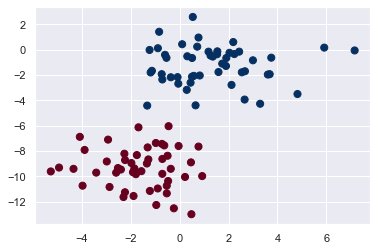

In [15]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')

## 가우시안 생성 모델
- 전제 : 차원 사이에 공분산이 없는 가우스 분포를 따른다.
- 이 모델은 단순히 각 레이블 내 점의 평균과 표준 편차를 구하여 적합할 수 있다.
- 각 색상의 타원은 타원의 중심으로 갈수록 확률이 더 커지는 각 레이블에 대한 가우스 생성 모델을 나타낸다.

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
rng = np.random.RandomState(0)
Xnew = [-6, -14]+[14,18]*rng.rand(2000,2)
ynew = model.predict(Xnew)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

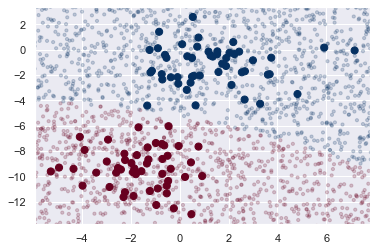

In [19]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=10, cmap='RdBu', alpha=0.2)
plt.axis(lim)

In [20]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])